
# 🧠 Hyperparameter Tuning & Evaluation — LSTM vs GRU

📅 Generated on 2025-05-31 14:04:11

This notebook performs:
- Grid tuning over LSTM & GRU
- Saves the best model for each
- Displays side-by-side confusion matrix and classification report


In [1]:
import numpy as np
import pickle
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load tokenized data
X_train = np.load("../models/lstm gru/initial/X_train.npy")
X_test = np.load("../models/lstm gru/initial/X_test.npy")
y_train = np.load("../models/lstm gru/initial/y_train.npy")
y_test = np.load("../models/lstm gru/initial/y_test.npy")

vocab_size = 10000
max_len = 50
num_classes = 3


2025-05-31 21:21:57.592569: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
results = []
best_score_lstm = 0
best_score_gru = 0
model_lstm_best = None
model_gru_best = None

model_types = ["lstm", "gru"]
units_list = [64, 128]
dropouts = [0.3, 0.5]
embedding_dims = [64, 128]
batch_sizes = [32]


In [3]:
for model_type in model_types:
    for units in units_list:
        for dropout in dropouts:
            for emb_dim in embedding_dims:
                for batch_size in batch_sizes:
                    print(f"🔄 {model_type.upper()} | Units={units} | Dropout={dropout} | Emb={emb_dim} | Batch={batch_size}")

                    model = Sequential()
                    model.add(Embedding(input_dim=vocab_size, output_dim=emb_dim))
                    if model_type == "lstm":
                        model.add(LSTM(units))
                    else:
                        model.add(GRU(units))
                    model.add(Dropout(dropout))
                    model.add(Dense(num_classes, activation='softmax'))
                    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

                    callbacks = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

                    history = model.fit(
                        X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=15,
                        batch_size=batch_size,
                        callbacks=callbacks,
                        verbose=0
                    )

                    y_pred = np.argmax(model.predict(X_test), axis=1)
                    f1 = f1_score(y_test, y_pred, average='macro')
                    print(f"🎯 F1 Score: {f1:.4f}")

                    results.append({
                        "model": model_type,
                        "units": units,
                        "dropout": dropout,
                        "embedding": emb_dim,
                        "batch_size": batch_size,
                        "f1_macro": f1
                    })

                    if model_type == "lstm" and f1 > best_score_lstm:
                        best_score_lstm = f1
                        model_lstm_best = model
                    elif model_type == "gru" and f1 > best_score_gru:
                        best_score_gru = f1
                        model_gru_best = model

🔄 LSTM | Units=64 | Dropout=0.3 | Emb=64 | Batch=32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
🎯 F1 Score: 0.5100
🔄 LSTM | Units=64 | Dropout=0.3 | Emb=128 | Batch=32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
🎯 F1 Score: 0.5336
🔄 LSTM | Units=64 | Dropout=0.5 | Emb=64 | Batch=32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
🎯 F1 Score: 0.5353
🔄 LSTM | Units=64 | Dropout=0.5 | Emb=128 | Batch=32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
🎯 F1 Score: 0.5526
🔄 LSTM | Units=128 | Dropout=0.3 | Emb=64 | Batch=32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
🎯 F1 Score: 0.4777
🔄 LSTM | Units=128 | Dropout=0.3 | Emb=128 | Batch=32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
🎯 F1 Score: 0.5388
🔄 LSTM | Units=128 | Dropout=0.5 | Emb=64 | Batch=32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
🎯 F1 Score: 0.5010
🔄 LSTM | Units=128 | Dropout=0.5 | Emb=128 | Batch=32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
🎯 F1 Score: 0.5544
🔄 GRU | Units=64 | Dropout=0.3 | Emb=64 | Batch=32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
🎯 F1 Score: 0

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/var/folders/kb/msyd5l4n7xj0yh064xpqdg400000gn/T/ipykernel_24915/242725591.py:22: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbook/anaconda3/envs/sentiment-analysis-nlp/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


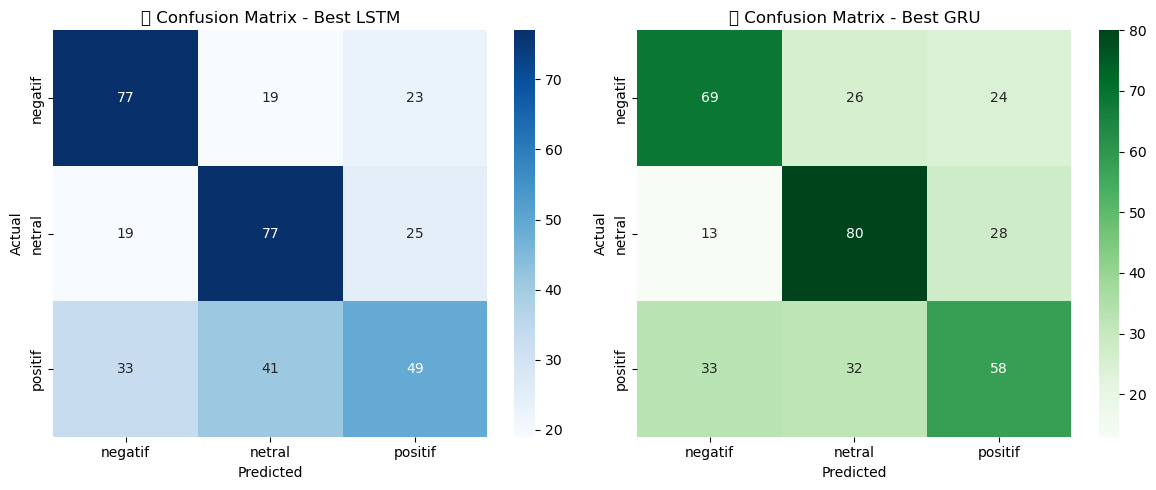

📋 Classification Report - LSTM
              precision    recall  f1-score   support

     negatif       0.60      0.65      0.62       119
      netral       0.56      0.64      0.60       121
     positif       0.51      0.40      0.45       123

    accuracy                           0.56       363
   macro avg       0.55      0.56      0.55       363
weighted avg       0.55      0.56      0.55       363

📋 Classification Report - GRU
              precision    recall  f1-score   support

     negatif       0.60      0.58      0.59       119
      netral       0.58      0.66      0.62       121
     positif       0.53      0.47      0.50       123

    accuracy                           0.57       363
   macro avg       0.57      0.57      0.57       363
weighted avg       0.57      0.57      0.57       363



In [5]:
# Evaluate models
y_pred_lstm = np.argmax(model_lstm_best.predict(X_test), axis=1)
y_pred_gru = np.argmax(model_gru_best.predict(X_test), axis=1)

cm_lstm = confusion_matrix(y_test, y_pred_lstm)
cm_gru = confusion_matrix(y_test, y_pred_gru)
labels = ['negatif', 'netral', 'positif']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("📘 Confusion Matrix - Best LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("📗 Confusion Matrix - Best GRU")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

print("📋 Classification Report - LSTM")
print(classification_report(y_test, y_pred_lstm, target_names=labels))

print("📋 Classification Report - GRU")
print(classification_report(y_test, y_pred_gru, target_names=labels))


In [6]:
model_lstm_best.save("../models/lstm gru/hyperparameter tuning/best_model_lstm.h5")
model_gru_best.save("../models/lstm gru/hyperparameter tuning/best_model_gru.h5")
print("✅ Best models saved.")


✅ Best models saved.


In [7]:
import tensorflow as tf
import pickle

# Load model dari .h5
model_lstm = tf.keras.models.load_model("../models/lstm gru/hyperparameter tuning/best_model_lstm.h5")
model_gru = tf.keras.models.load_model("../models/lstm gru/hyperparameter tuning/best_model_gru.h5")

# Simpan sebagai .pkl
with open("../models/lstm gru/hyperparameter tuning/best_model_lstm.pkl", "wb") as f:
    pickle.dump(model_lstm, f)

with open("../models/lstm gru/hyperparameter tuning/best_model_gru.pkl", "wb") as f:
    pickle.dump(model_gru, f)